# Project Block 2 – Exploratory Analysis: Speed Dating

In [1]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 📥 Load dataset
df = pd.read_csv("Speed_Dating_Data.csv", encoding='ISO-8859-1')

In [3]:
# 🧹 Clean the data
df_clean = df.copy()
threshold = len(df_clean) * 0.5
df_clean = df_clean.dropna(thresh=threshold, axis=1)

In [4]:
# 🎯 Select relevant columns
columns = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'match']
df_model = df_clean[columns].dropna()

In [5]:
# 📊 Descriptive statistics
df_model.describe()

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,match
count,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000,7031.000000
mean,6.194339,7.164415,7.358128,6.399232,6.760845,5.463590,0.172522
std,1.949794,1.742447,1.560115,1.958363,1.796793,2.150132,0.377860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,0.000000
50%,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,0.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,0.000000
max,10.000000,10.000000,10.000000,11.000000,10.000000,10.000000,1.000000


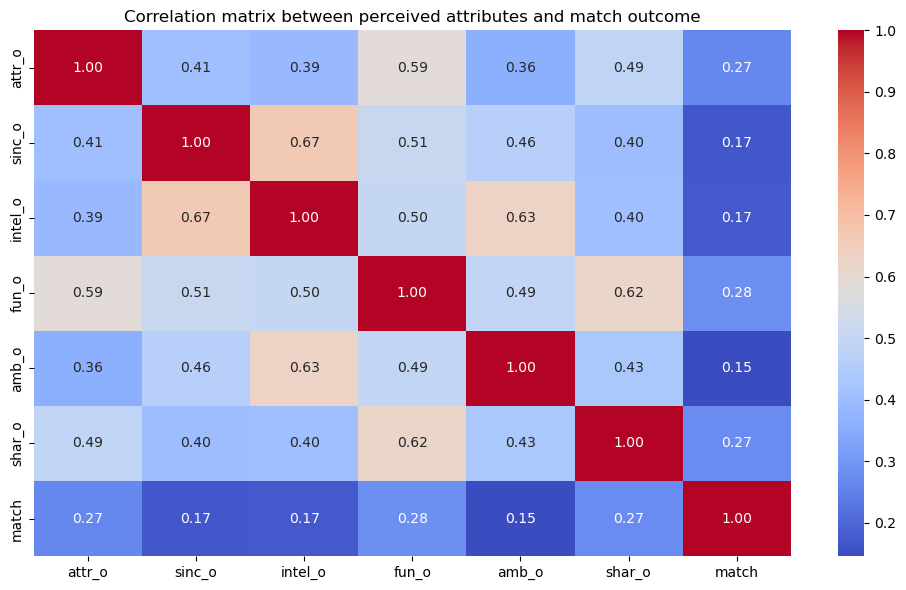

In [6]:
# 🔥 Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix between perceived attributes and match outcome")
plt.tight_layout()
plt.show()

In [7]:
# 🧪 T-test: Attractiveness vs Match
match_yes = df_model[df_model['match'] == 1]['attr_o']
match_no = df_model[df_model['match'] == 0]['attr_o']
t_stat, p_value = ttest_ind(match_yes, match_no, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2e}")

T-statistic: 26.31
P-value: 1.29e-131


/var/folders/_2/hfv1mrln6yqfmk6b44ty90zc0000gn/T/ipykernel_13091/2045766844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x='match', y='attr_o', palette="Set2")


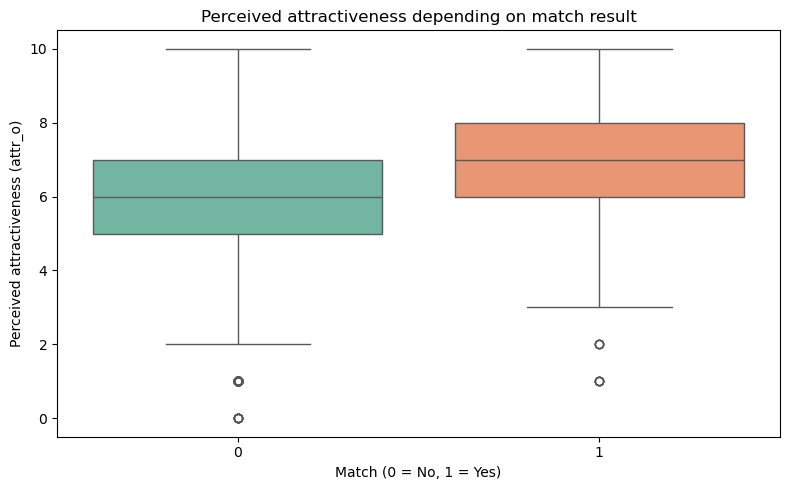

In [8]:
# 📦 Boxplot: attractiveness by match result
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_model, x='match', y='attr_o', palette="Set2")
plt.title("Perceived attractiveness depending on match result")
plt.xlabel("Match (0 = No, 1 = Yes)")
plt.ylabel("Perceived attractiveness (attr_o)")
plt.tight_layout()
plt.show()

In [9]:
# 🤖 Logistic Regression Model
X = df_model.drop('match', axis=1)
y = df_model['match']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [10]:
# 📈 Classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1729
           1       0.47      0.09      0.15       381

    accuracy                           0.82      2110
   macro avg       0.65      0.53      0.52      2110
weighted avg       0.76      0.82      0.76      2110



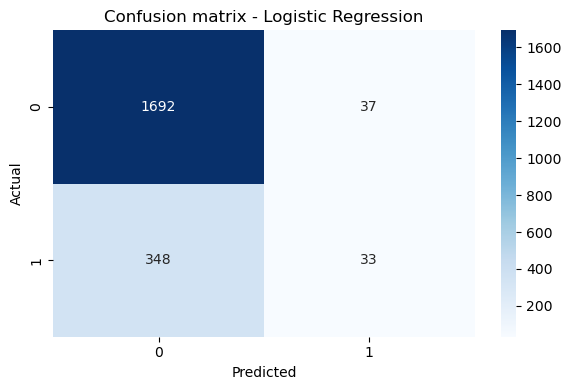

In [11]:
# 📉 Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()